In [1]:
!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/de/cd/d80c9e284ae6c1b2172dacf0651d25b78ee1f7efbc12d74ea7b87c766263/regex-2023.8.8-cp311-cp311-win_amd64.whl.metadata
  Using cached regex-2023.8.8-cp311-cp311-win_amd64.whl.metadata (42 kB)
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
Using cached regex-2023.8.8-cp311-cp311-win_amd64.whl (268 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached tqdm-4.66.1-py3-none

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Load Spam Data and review content
spam_data = pd.read_csv("encoded-spam.csv")

print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())

#Separate feature and target data
spam_classes_raw = spam_data["v1"]
spam_messages = spam_data["v2"]



Loaded Data :
------------------------------------
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:

import nltk
import tensorflow as tf

#Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)
print(tfidf)
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

C:\Users\laksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


  (0, 8319)	0.18102257719228587
  (0, 1383)	0.32398411680095285
  (0, 3818)	0.15049278609813793
  (0, 2328)	0.2737030910891757
  (0, 73)	0.2210899700139781
  (0, 2028)	0.3092778595313599
  (0, 3057)	0.19301578749020612
  (0, 4697)	0.2737030910891757
  (0, 8523)	0.2171890405383415
  (0, 3854)	0.17930329356861954
  (0, 5398)	0.17488233852105456
  (0, 2030)	0.2737030910891757
  (0, 1602)	0.24429057654998973
  (0, 72)	0.128771262749728
  (0, 2584)	0.25340577429192157
  (0, 48)	0.09005361394379836
  (0, 6071)	0.2212232046925318
  (0, 4567)	0.32398411680095285
  (0, 3775)	0.14385468209961744
  (1, 5711)	0.4933852045326102
  (1, 7998)	0.1768535132835545
  (1, 8435)	0.38959051227670327
  (1, 4537)	0.4821636547095492
  (1, 4730)	0.3685564842992439
  (1, 5682)	0.2538509654354545
  :	:
  (5569, 7453)	0.534745642874064
  (5569, 5303)	0.46585003314793316
  (5569, 39)	0.29154288162315495
  (5569, 71)	0.11169267830095224
  (5569, 1057)	0.15807830770078501
  (5569, 73)	0.1911337887672887
  (5569, 48)	

In [10]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                282656    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 283778 (1.08 MB)
Trainable params: 283778 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
16/16 [==============================] - 3s 85ms/step - loss: 0.6319 - accuracy: 0.8407 - val_loss: 0.5590 - val_accuracy: 0.8724
Epoch 2/10
16/16 [==============================] - 0s 31ms/step - loss: 0.5014 - accuracy: 0.8636 - val_loss: 0.4302 - val_accuracy: 0.8724
Epoch 3/10
16/16 [==============================] - 0s 22ms/step - loss: 0.3831 - accuracy: 0.8636 - val_loss: 0.3284 - val_accuracy: 0.8724
Epoch 4/10
16/16 [==============================] - 1s 51ms/step - loss: 0.2931 - accuracy: 0.8646 - val_loss: 0.2560 - val_accuracy: 0.8744
Epoch 5/10
16/16 [==============================] - 1s 55ms/step - loss: 0.2263 - accuracy: 0.8873 - val_loss: 0.2025 - val_accuracy: 0.9182
Epoch 6/10
16/16 [==============================] - 1s 44ms/step - loss: 0.1731 - accuracy: 0.9397 - val_loss: 0.1587 - val_accuracy: 0.9501
Epoch 7/10
16/16 [==============================] - 1s 50ms/step - loss: 0.1302 - accuracy: 0.966

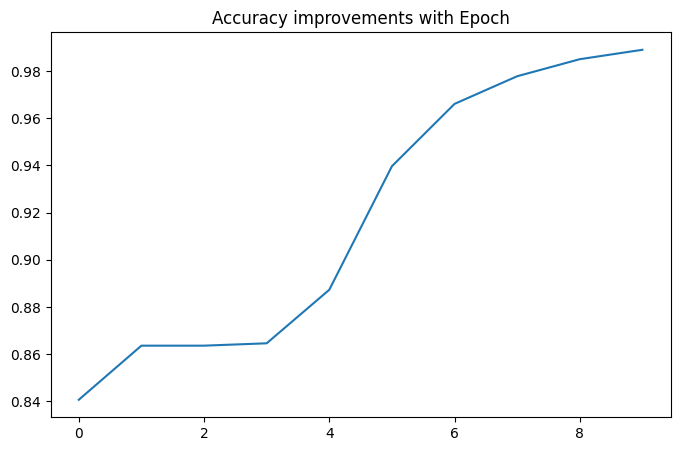


Evaluation against Test Dataset :
------------------------------------
18/18 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9857


[0.0737040638923645, 0.9856630563735962]

In [11]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [14]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform([""]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(1, 8832)
1/1 [==============================] - 0s 68ms/step
Prediction Output: [0]
Prediction Classes are  ['ham']
